In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('headbrain.csv')#Reading data
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [3]:
df.isnull().sum()#Check if the Data is clean

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [4]:
df.duplicated().sum()#Check if there is a duplication

0

In [5]:
#EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [7]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


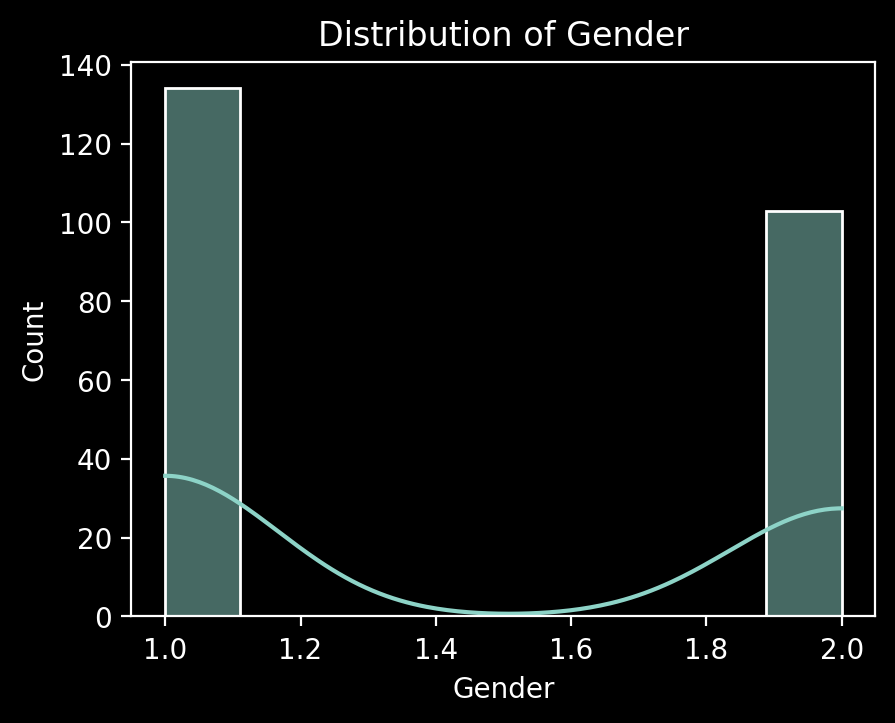

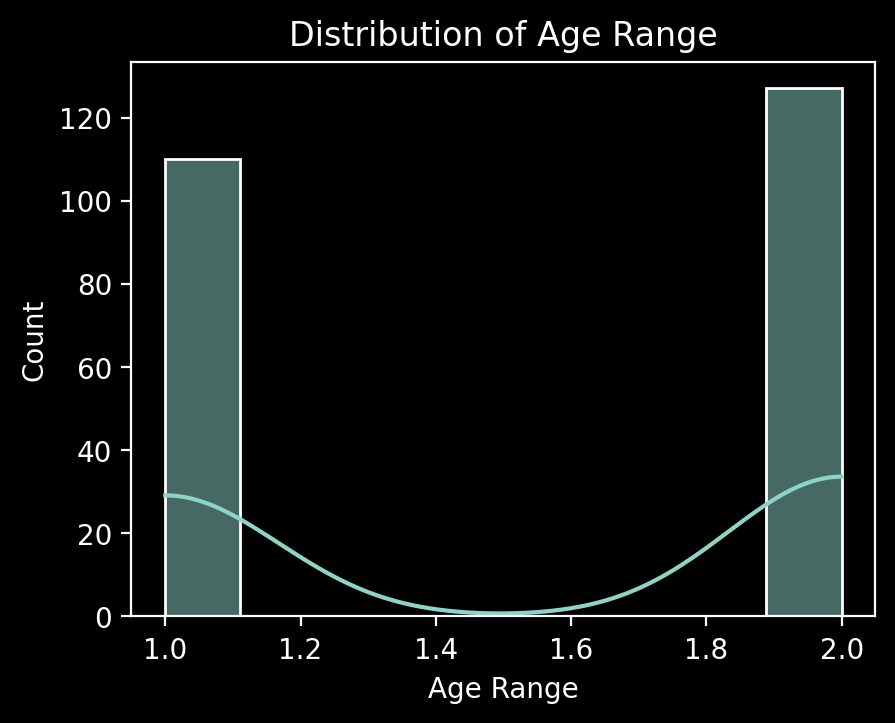

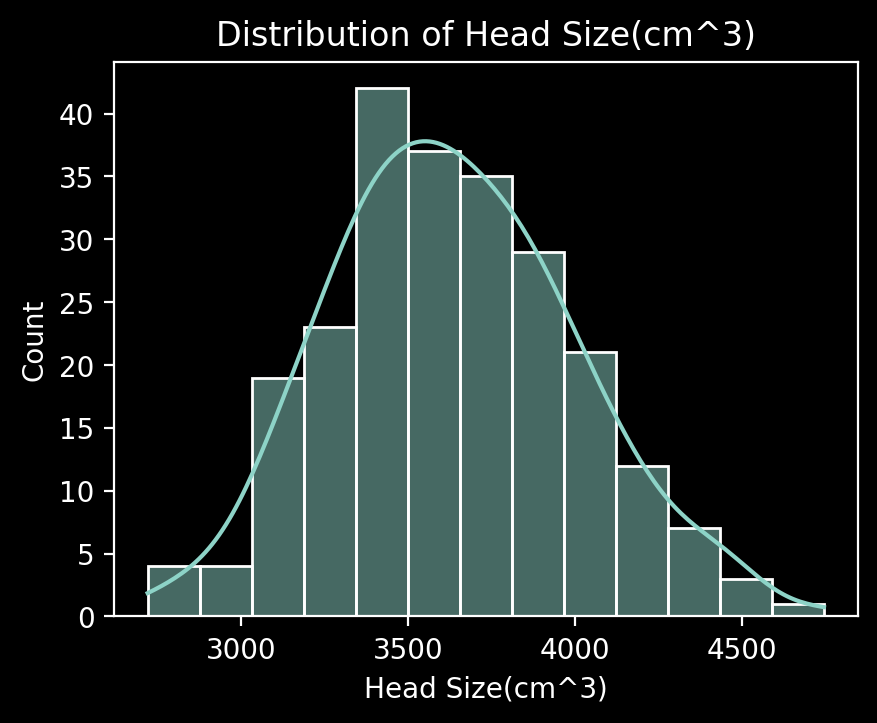

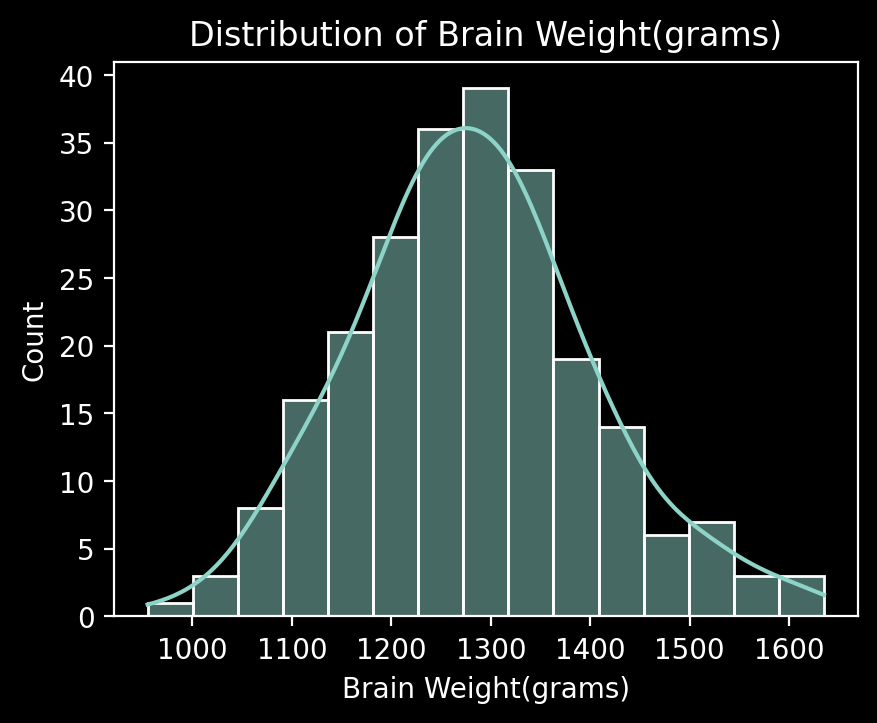

In [16]:
# Plot distributions for each column
for col in df.columns:
    plt.figure()
    sns.histplot(df[col], kde=True);
    plt.title(f'Distribution of {col}')

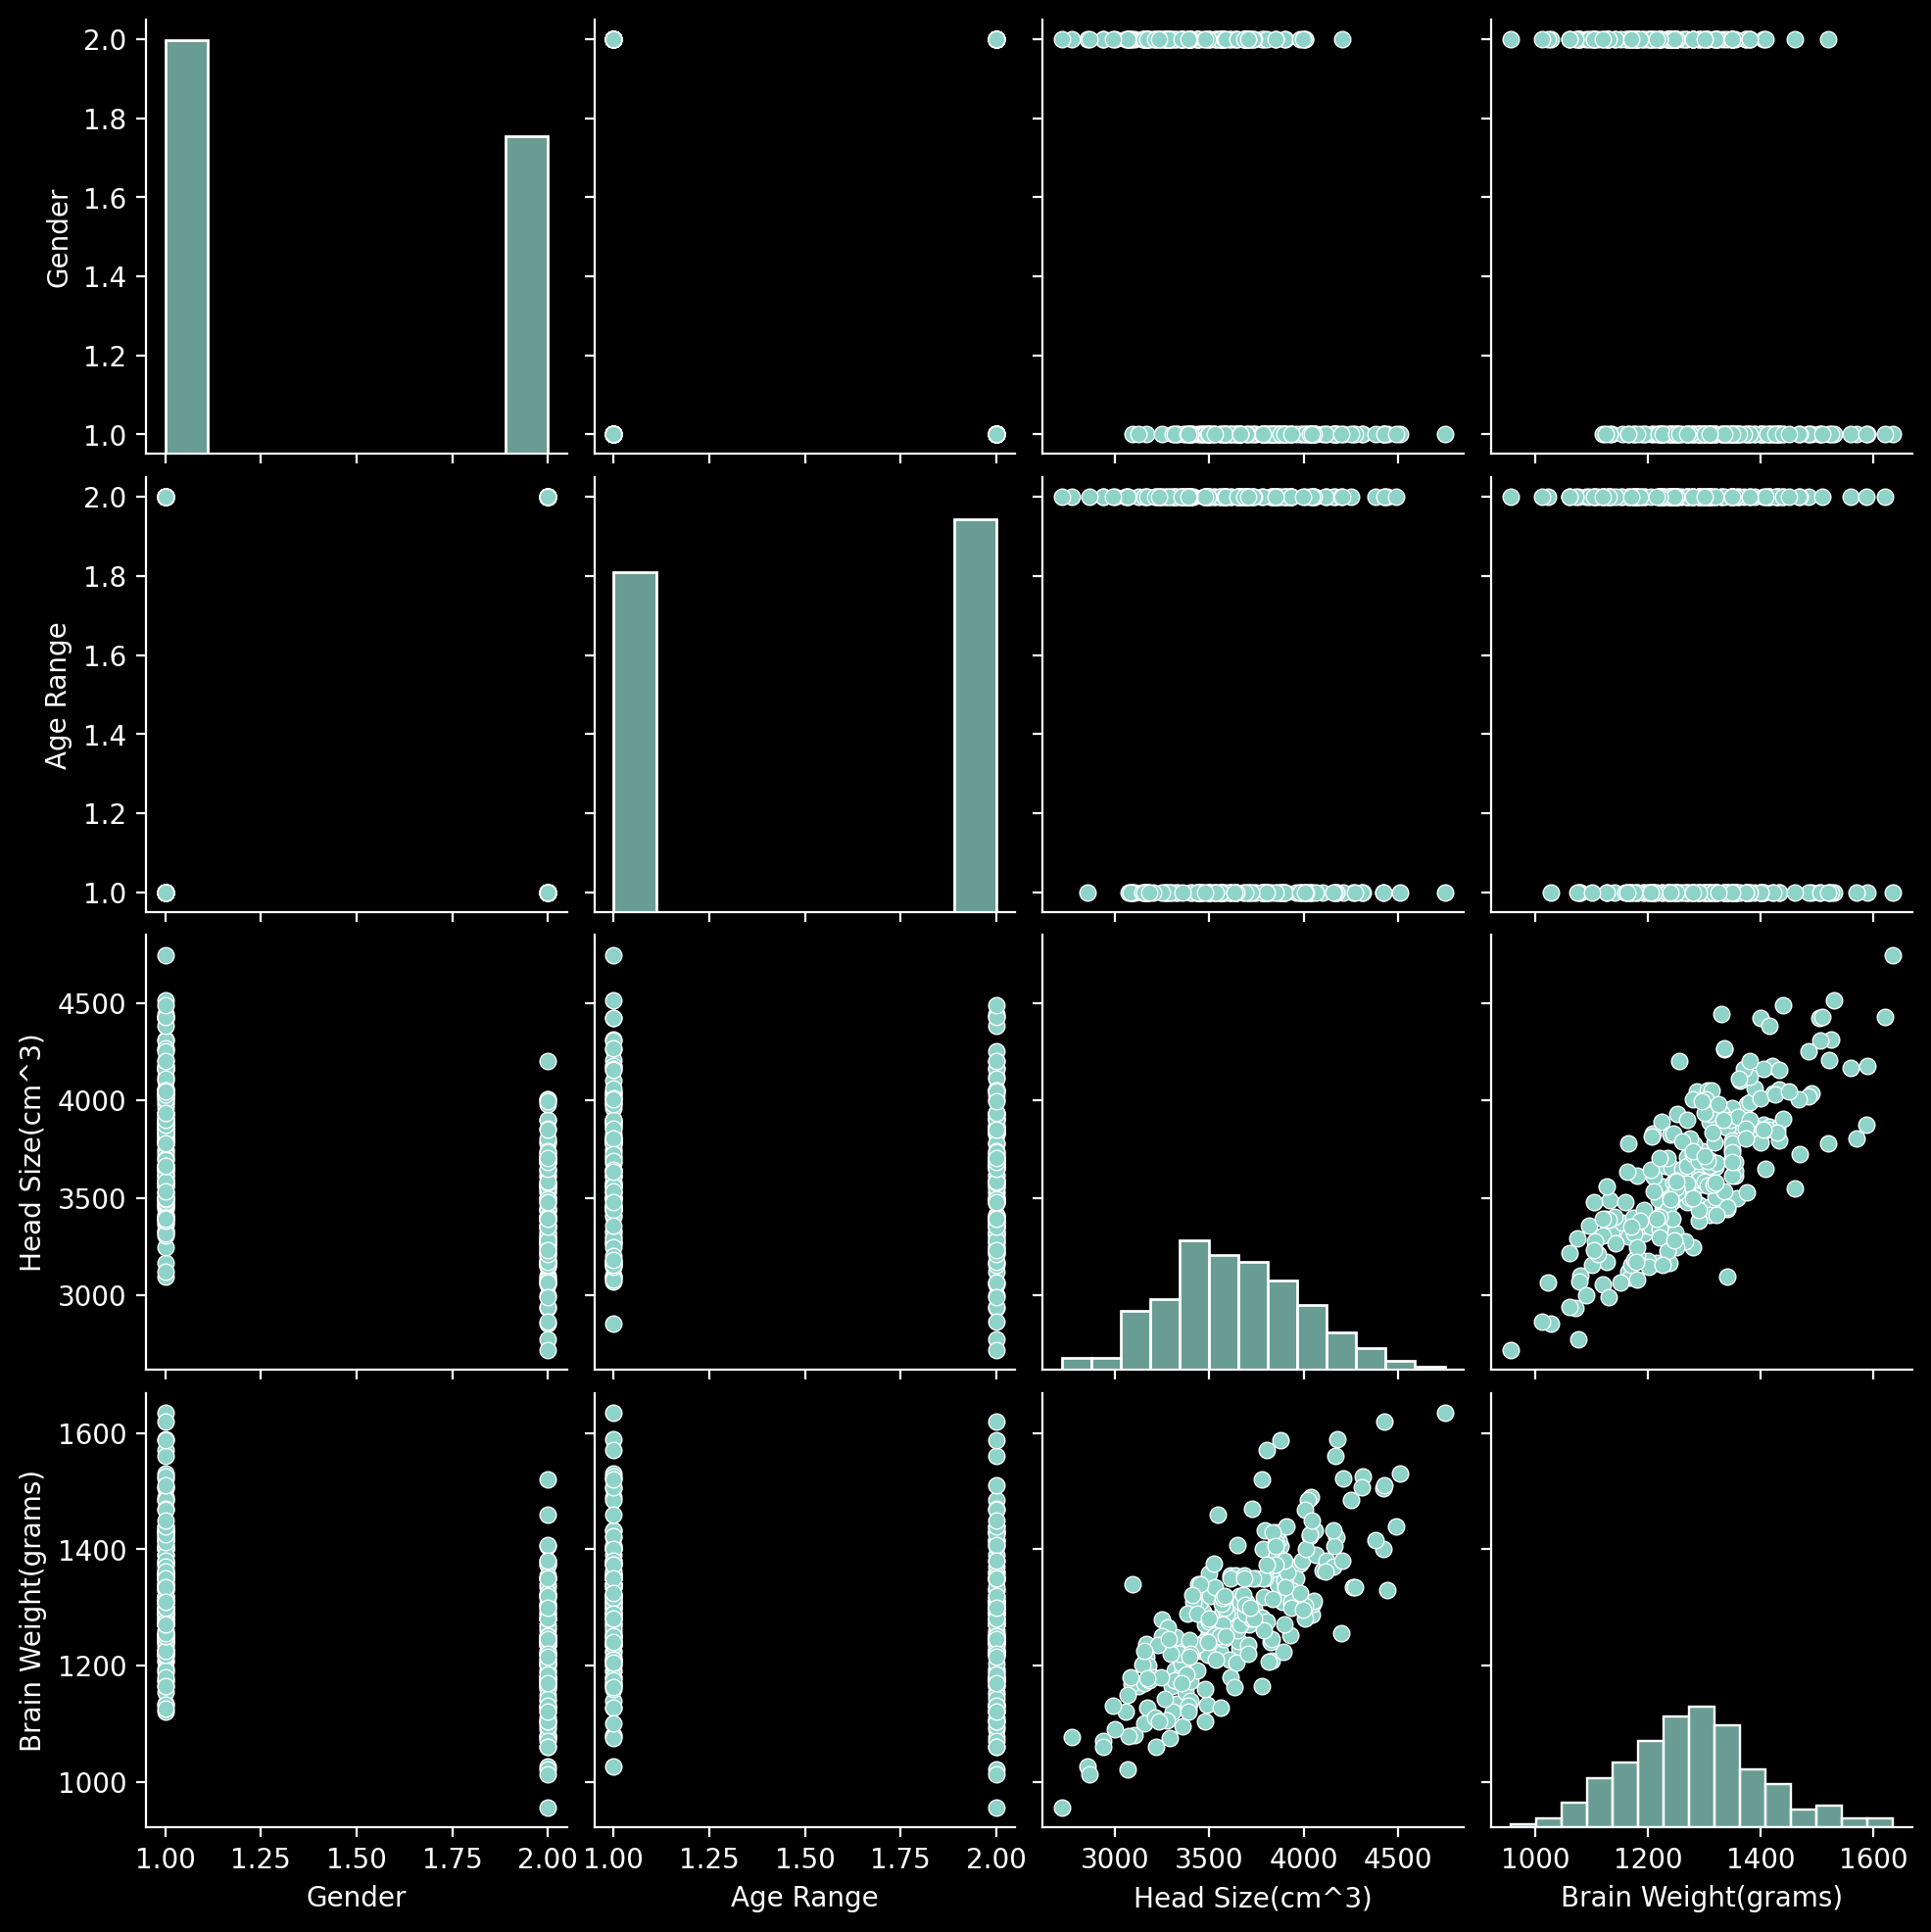

In [17]:
sns.pairplot(df);

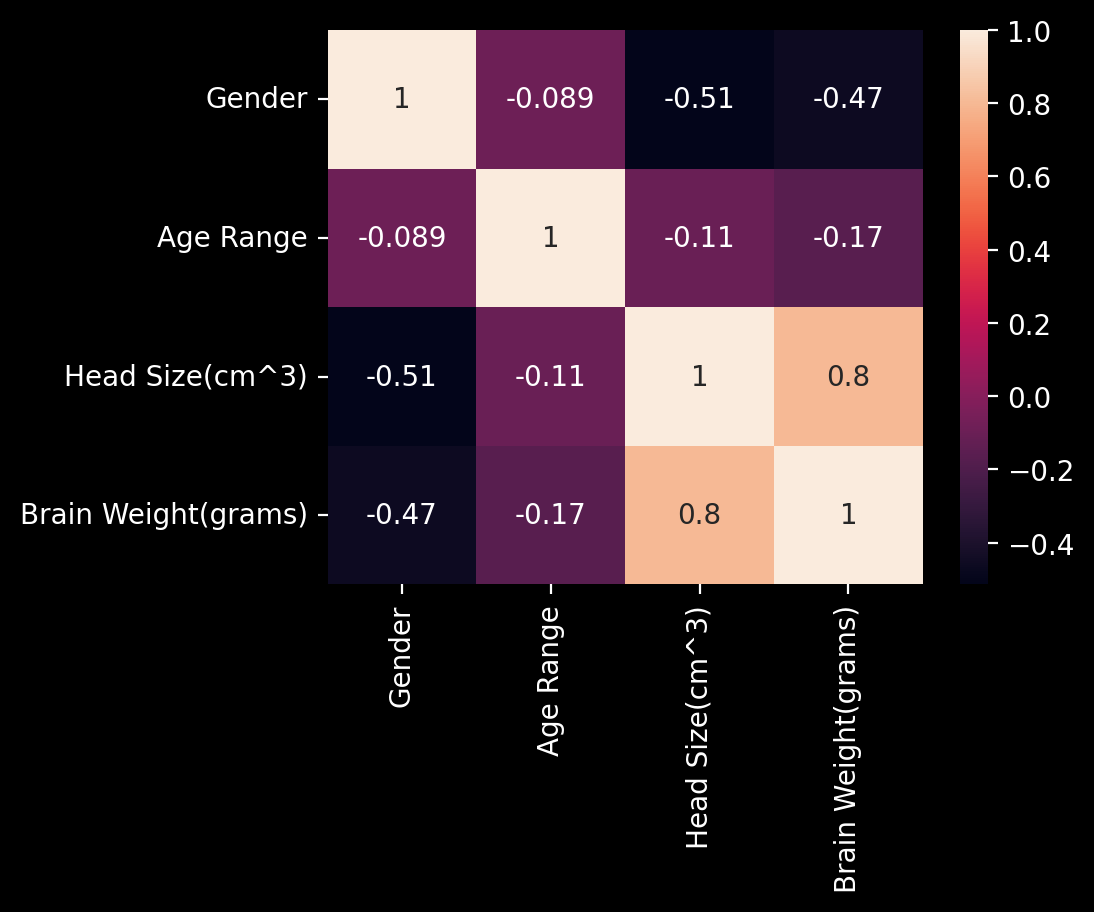

In [18]:
sns.heatmap(df.corr(),annot=True);

In [20]:
# Collecting X and Y
x = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [24]:
# Mean X and Y
mean_x = np.mean(x)
mean_y = np.mean(y)

#Total number of values
m = len(x)

#Using the formula to calculate b1 and b0

number = 0
denom = 0

for i in range(m):#  equation: m=E (x-x mean)(y-y mean) / (x-x mean)^2
    number += (x[i]-mean_x) * (y[i]-mean_y)
    denom += (x[i]-mean_x) ** 2
    
b1 = number/denom #m
#y mean = (m * x mean) + c
#to find c = y mean - (m * x mean)
b0 = mean_y - (b1*mean_x)#c

#print cofficients
print('m = '+str(b1),'c = '+str(b0))

m = 0.26342933948939945 c = 325.57342104944223


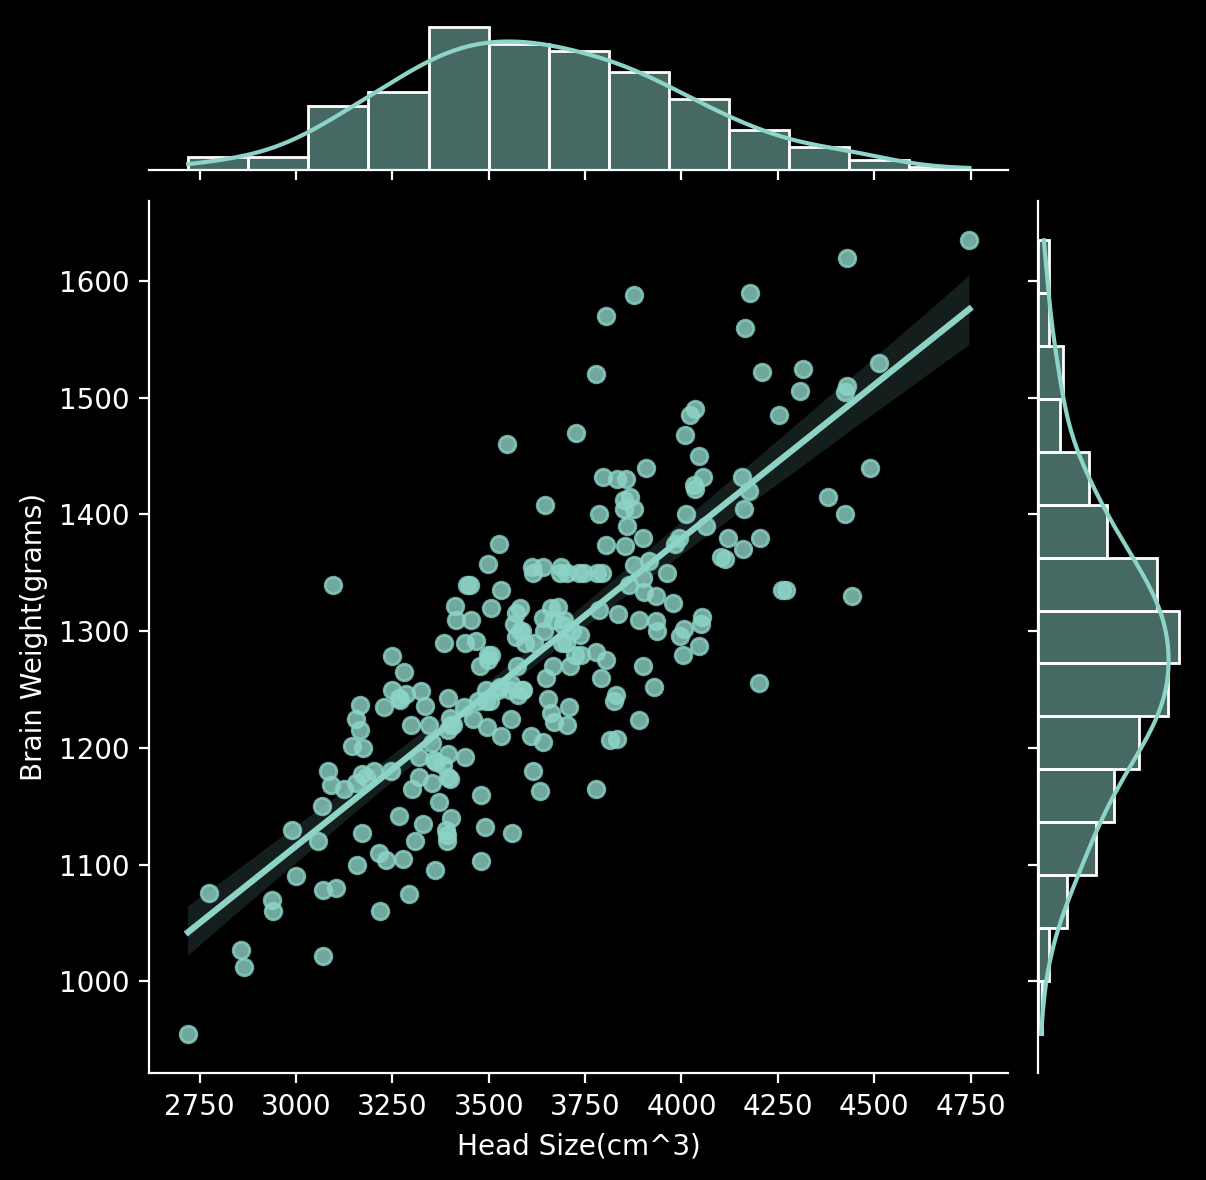

In [25]:
#The relationship between Bring weight and Head size
sns.jointplot(data=df,x='Head Size(cm^3)',y='Brain Weight(grams)',kind='reg');

In [28]:
ss_t = 0
ss_r = 0

for i in range(m):
    y_pred = (b1 * x[i]) + b0 # y = (m * x) + c
    ss_t += (y[i] - mean_y) ** 2 
    ss_r += (y[i] - y_pred) ** 2 
# r^2 = E (y prediction-y mean)^2 / E (y - y mean)^2 
r2 = 1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [29]:
#now we will use scikit-learn

In [30]:
#training and testing split
x = df.drop('Brain Weight(grams)',axis=1)
y = df['Brain Weight(grams)']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=23)

In [32]:
x_train.shape

(165, 3)

In [33]:
x_test.shape

(72, 3)

In [34]:
y_train.shape

(165,)

In [35]:
y_test.shape

(72,)

In [36]:
#model training

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(x_train,y_train)

LinearRegression()

In [39]:
lm.score(x_test,y_test)

0.6552817424644717

In [40]:
lm.coef_

array([-14.97479808, -24.14422255,   0.25424319])

In [41]:
lm.intercept_

418.6063581238584

In [42]:
predictions = lm.predict(x_test)
predictions = pd.DataFrame(predictions,columns=['predictions'])
predictions

,predictions
0,1181.379254
1,1290.949190
2,1153.683415
3,1344.111568
4,1361.628798
...,...
67,1142.759839
68,1201.481136
69,1356.823727
70,1282.822288


In [43]:
predictions['Actual'] = np.array(y_test)
predictions

,predictions,Actual
0,1181.379254,1279
1,1290.949190,1300
2,1153.683415,1080
3,1344.111568,1373
4,1361.628798,1340
...,...,...
67,1142.759839,1225
68,1201.481136,1075
69,1356.823727,1334
70,1282.822288,1260


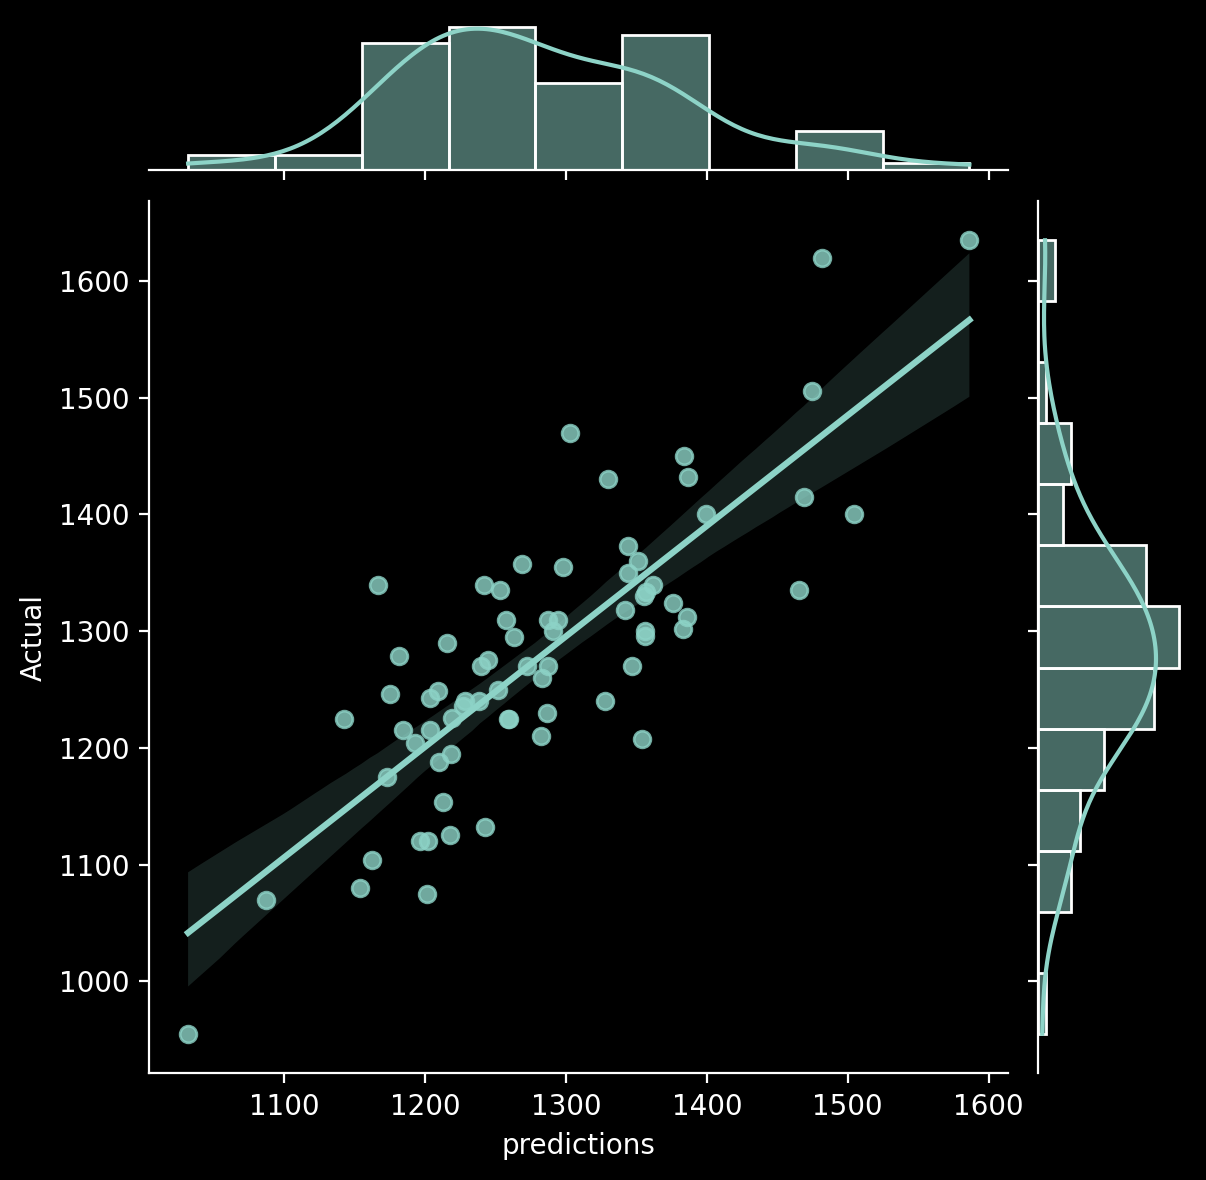

In [44]:
sns.jointplot(data=predictions,x='predictions',y='Actual',kind='reg');

In [45]:
metrics.mean_absolute_error(y_test,predictions['predictions'])#MAE

54.13324006835953

In [46]:
np.sqrt(metrics.mean_squared_error(y_test,predictions['predictions']))#RMSE

68.01934459595253

In [47]:
metrics.r2_score(y_test,predictions['predictions'])#R^2

0.6552817424644717

<ipython-input-48-ba4c972aa7dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions['predictions']));


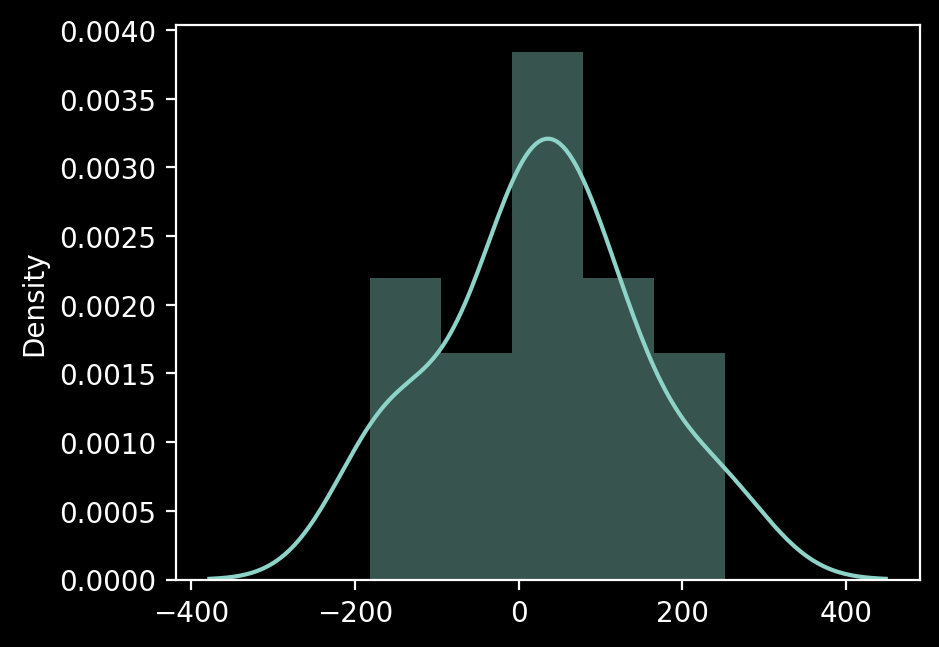

In [48]:
sns.distplot((y_test-predictions['predictions']));